To run the notebook, you must install skfeature:

`pip3 install skfeature-chappers`

To install skfeature-chapper.

In [1]:
import generate_data as gd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif, SelectKBest, SelectPercentile
from sklearn.preprocessing import MinMaxScaler
from skfeature.function.similarity_based import fisher_score
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from filters import lda,knn, run_filters
import time
from sklearn.metrics import accuracy_score

import pylab
import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (8.0, 8.0)

In [2]:
nr_features = 30
X,y = gd.gaussian_clusters(nr_features=nr_features, nr_classes=20, \
                           nr_data_points=100, random_diag=True, variance_size=8)

print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

(2000, 30)


### Original Classification using KNN

In [3]:
def orig_class(X_train, X_test, y_train, y_test, class_alg=KNeighborsClassifier()):
  
    start_t = time.time()
    model = class_alg.fit(X_train,y_train)

    y_test_pred = model.predict(X_test)

    orig_acc = accuracy_score(y_test, y_test_pred)
    orig_time = time.time() - start_t

    return orig_time, orig_acc

### Variance Threshold feature selection and classification

In [4]:
def vt_feat_sel(X_train, X_test, y_train, y_test, class_alg=KNeighborsClassifier()):

    t_start = time.time()
    var = np.zeros(len(X_train[0,:]))
  
    for i in range(len(X_train[0,:])):
    
        var[i] = np.var(X_train[:,i])
    
        ind_max_var = np.argsort(var)
  
    vt_acc = np.zeros(len(X_train[0,:]))
  
    for i in range(len(X_train[0,:])):
    
        X_temp = X_train[:,ind_max_var[0:(i+1)]]
        X_test_temp = X_test[:,ind_max_var[0:(i+1)]]

        class_alg.fit(X_temp, y_train)

        y_test_pred = class_alg.predict(X_test_temp)
        vt_acc[i] = accuracy_score(y_test, y_test_pred, normalize=True)
    
    vt_time = time.time()-t_start  
    vt_max_acc = max(vt_acc)
    vt_selected_features = np.argmax(vt_acc)

    return vt_time, vt_max_acc, vt_selected_features + 1

In [3]:
best_ks, best_scores, times, f_scores_filtered_knn, f_scores_filtered_lda, mi_scores_filtered_knn, \
mi_scores_filtered_lda, chi2_scores_filtered_knn, \
chi2_scores_filtered_lda = run_filters(X_train, y_train, X_test, y_test)


Order: f_score knn, mutual information knn, chi2 knn, f score lda, mutual information lda, chi2 lda


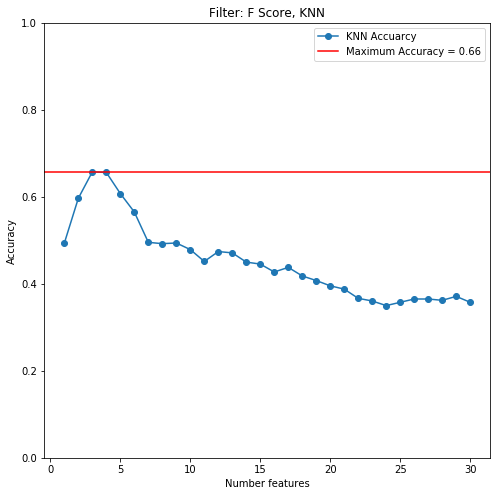

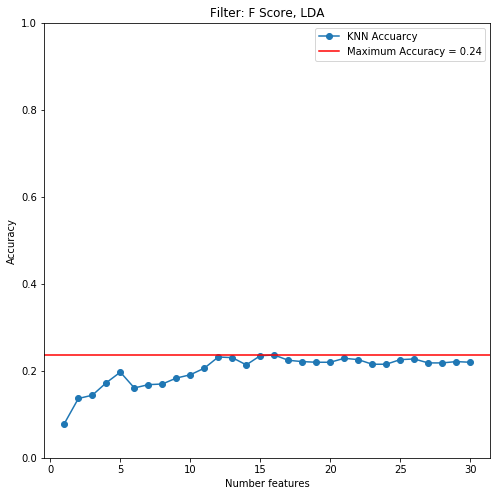

In [4]:
save_figs = False

plt.title("Filter: F Score, KNN")
ax = plt.plot(range(1,nr_features+1), f_scores_filtered_knn, marker='o')
plt.ylim((0, 1))
plt.xlabel("Number features")
plt.ylabel("Accuracy")

plt.axhline(y=max(f_scores_filtered_knn), c='r')
labels = ["KNN Accuarcy", "Maximum Accuracy = {:0.2f}".format(max(f_scores_filtered_knn))]
plt.legend(labels = labels)
if save_figs:
    plt.savefig("fscore-knn", dpi=300,
            orientation='portrait',
            transparent=False, bbox_inches=None, pad_inches=0.1)
    

plt.show()

plt.title("Filter: F Score, LDA")
plt.plot(range(1,nr_features+1), f_scores_filtered_lda, marker='o')
plt.ylim((0, 1))
plt.xlabel("Number features")
plt.ylabel("Accuracy")
plt.axhline(y=max(f_scores_filtered_lda),  c='r')
labels = ["KNN Accuarcy", "Maximum Accuracy = {:0.2f}".format(max(f_scores_filtered_lda))]
plt.legend(labels = labels)
if save_figs:
    plt.savefig("fscore-lda", dpi=300,
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1)

plt.show()

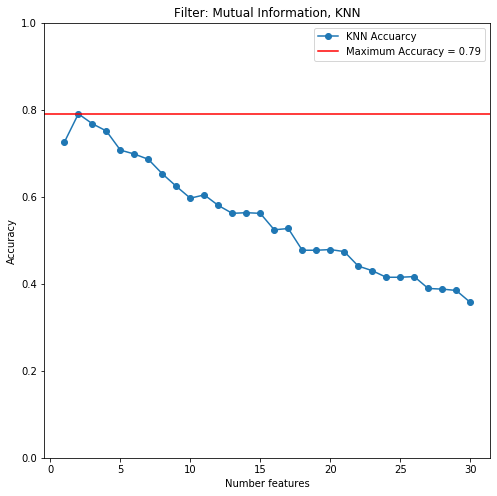

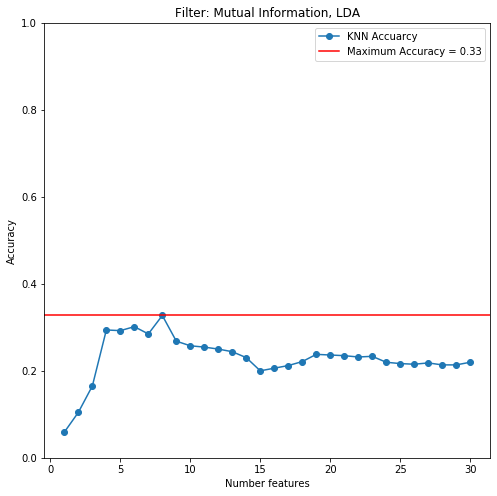

In [5]:
save_figs = False

plt.title("Filter: Mutual Information, KNN")
ax = plt.plot(range(1,nr_features+1), mi_scores_filtered_knn, marker='o')
plt.ylim((0, 1))
plt.xlabel("Number features")
plt.ylabel("Accuracy")

plt.axhline(y=max(mi_scores_filtered_knn), c='r')
labels = ["KNN Accuarcy", "Maximum Accuracy = {:0.2f}".format(max(mi_scores_filtered_knn))]
plt.legend(labels = labels)
if save_figs:
    plt.savefig("mi-knn", dpi=300,
            orientation='portrait',
            transparent=False, bbox_inches=None, pad_inches=0.1)
    

plt.show()

plt.title("Filter: Mutual Information, LDA")
plt.plot(range(1,nr_features+1), mi_scores_filtered_lda, marker='o')
plt.ylim((0, 1))
plt.xlabel("Number features")
plt.ylabel("Accuracy")
plt.axhline(y=max(mi_scores_filtered_lda),  c='r')
labels = ["KNN Accuarcy", "Maximum Accuracy = {:0.2f}".format(max(mi_scores_filtered_lda))]
plt.legend(labels = labels)
if save_figs:
    plt.savefig("fscore-lda", dpi=300,
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1)

plt.show()

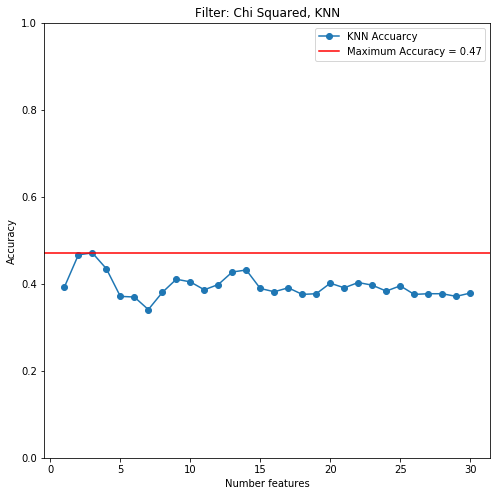

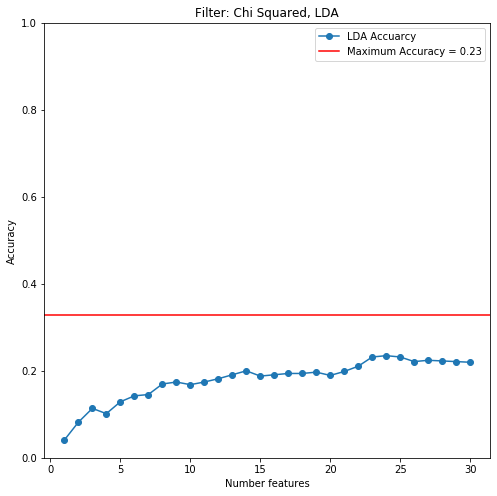

In [6]:
save_figs = False

plt.title("Filter: Chi Squared, KNN")
ax = plt.plot(range(1,nr_features+1), chi2_scores_filtered_knn, marker='o')
plt.ylim((0, 1))
plt.xlabel("Number features")
plt.ylabel("Accuracy")

plt.axhline(y=max(chi2_scores_filtered_knn), c='r')
labels = ["KNN Accuarcy", "Maximum Accuracy = {:0.2f}".format(max(chi2_scores_filtered_knn))]
plt.legend(labels = labels)
if save_figs:
    plt.savefig("mi-knn", dpi=300,
            orientation='portrait',
            transparent=False, bbox_inches=None, pad_inches=0.1)
    

plt.show()

plt.title("Filter: Chi Squared, LDA")
plt.plot(range(1,nr_features+1), chi2_scores_filtered_lda, marker='o')
plt.ylim((0, 1))
plt.xlabel("Number features")
plt.ylabel("Accuracy")
plt.axhline(y=max(mi_scores_filtered_lda),  c='r')
labels = ["LDA Accuarcy", "Maximum Accuracy = {:0.2f}".format(max(chi2_scores_filtered_lda))]
plt.legend(labels = labels)
if save_figs:
    plt.savefig("fscore-lda", dpi=300,
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches=None, pad_inches=0.1)

plt.show()

## Filtering for larger number of classes

Running the filters for up to 100 classes gives us. We are also skipping the LDA since they really suc

In [5]:
nr_features=40
nr_classes= np.array([2,5,10,20,30,40])
nr_points = 1000
variance_size = 8

f_score_accs = np.zeros(len(nr_classes))
mi_accs = np.zeros(len(nr_classes))
chi2_accs = np.zeros(len(nr_classes))
vt_accs = np.zeros(len(nr_classes))
orig_accs = np.zeros(len(nr_classes))


f_score_times =  np.zeros(len(nr_classes))
mi_times = np.zeros(len(nr_classes))
chi2_times = np.zeros(len(nr_classes))
vt_times = np.zeros(len(nr_classes))
orig_times = np.zeros(len(nr_classes))



for i,nc in enumerate(nr_classes):
    
    X,y = gd.gaussian_clusters(nr_features, nr_classes=nc, \
                           nr_data_points=nr_points, random_diag=True, variance_size=variance_size)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    orig_time, orig_acc = orig_class(X_train, X_test, y_train, y_test)
    
    print("========= Num Classes {} ==========".format(nc))
    
    best_ks, best_scores, times, f_scores_filtered_knn, f_scores_filtered_lda, mi_scores_filtered_knn, \
    mi_scores_filtered_lda, chi2_scores_filtered_knn, \
    chi2_scores_filtered_lda = run_filters(X_train, y_train, X_test, y_test)
    vt_time, vt_acc, vt_num_feat = vt_feat_sel(X_train, X_test, y_train, y_test)
    
    # Scores
    f_score_accs[i] = np.max(f_scores_filtered_knn)
    mi_accs[i] = np.max(mi_scores_filtered_knn)
    chi2_accs[i] = np.max(chi2_scores_filtered_knn)
    vt_accs[i] = np.max(vt_acc)
    orig_accs[i] = orig_acc
    
    
    # Times
    f_score_times[i] = times[0]
    mi_times[i] = times[1]
    chi2_times[i] = times[2]
    orig_times[i] = orig_time
    vt_times[i] = vt_time

========= Num Classes 2 ==========
========= Num Classes 5 ==========
========= Num Classes 10 ==========
========= Num Classes 20 ==========
========= Num Classes 30 ==========
========= Num Classes 40 ==========


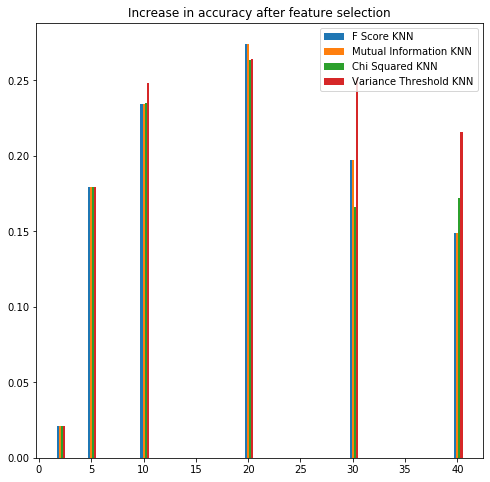

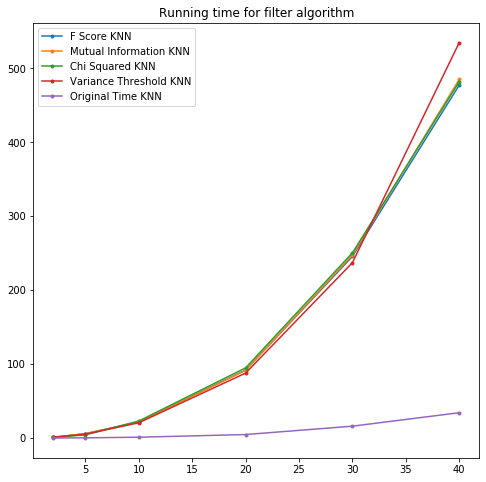

In [6]:
plt.title("Increase in accuracy after feature selection")
plt.bar(nr_classes-0.2, f_score_accs-orig_accs, label="F Score KNN", width=0.2, align='center')
plt.bar(nr_classes, mi_accs-orig_accs,  label="Mutual Information KNN",width=0.2)
plt.bar(nr_classes+0.2, chi2_accs-orig_accs,  label="Chi Squared KNN",width=0.2)
plt.bar(nr_classes+0.4, vt_accs-orig_accs,  label="Variance Threshold KNN",width=0.2)
plt.legend()
plt.show()

plt.title("Running time for filter algorithm")
plt.plot(nr_classes, f_score_times, marker='.', label="F Score KNN")
plt.plot(nr_classes, mi_times, marker='.', label="Mutual Information KNN")
plt.plot(nr_classes, chi2_times, marker='.', label="Chi Squared KNN")
plt.plot(nr_classes, vt_times, marker='.', label="Variance Threshold KNN")
plt.plot(nr_classes, orig_times, marker='.', label="Original Time KNN")
plt.legend()
plt.show()